# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [1]:
#https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing
!pip install gdown
!gdown --id 1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
!unzip Traffic_Signs.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
From (redirected): https://drive.google.com/uc?id=1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ&confirm=t&uuid=960176ae-e5e6-4276-aaf9-b18d0f85dc0f
To: /content/Traffic_Signs.zip
100% 244M/244M [00:01<00:00, 225MB/s]
Archive:  Traffic_Signs.zip
replace Traffic_Signs/Dataset_MetaData.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Import Libraries

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import cv2

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

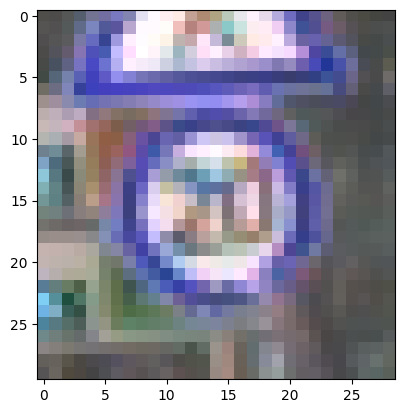

In [4]:
image = cv2.imread('/content/Traffic_Signs/Dataset/0/00000_00000_00000.png')
plt.imshow(image)

## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [24]:
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.15)
train_generator = datagen.flow_from_directory( '/content/Traffic_Signs/Dataset', target_size=(32, 32), batch_size=32, class_mode='categorical',subset='training')
test_generator = datagen.flow_from_directory( '/content/Traffic_Signs/Dataset', target_size=(32, 32), batch_size=32, class_mode='categorical', subset='validation')

Found 33337 images belonging to 43 classes.
Found 5872 images belonging to 43 classes.


## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [26]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(265, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(43, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [69]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [70]:
history = model.fit(train_generator,epochs=10,validation_data=test_generator,batch_size=1024,callbacks = early_stopping)

Epoch 1/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 88s 85ms/step - accuracy: 0.9878 - loss: 0.0387 - val_accuracy: 0.9370 - val_loss: 0.2772
Epoch 2/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 128s 71ms/step - accuracy: 0.9878 - loss: 0.0435 - val_accuracy: 0.9553 - val_loss: 0.2335
Epoch 3/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 81s 71ms/step - accuracy: 0.9915 - loss: 0.0280 - val_accuracy: 0.9434 - val_loss: 0.2762
Epoch 4/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 75s 72ms/step - accuracy: 0.9901 - loss: 0.0347 - val_accuracy: 0.9516 - val_loss: 0.2530
Epoch 5/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.9912 - loss: 0.0325 - val_accuracy: 0.9501 - val_loss: 0.2484


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [71]:
model.evaluate(test_generator)

395/395 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9519 - loss: 0.2536


[0.23348957300186157, 0.95526522397995]

In [72]:
model.save('traffic_sign_model.h5')

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [73]:
#https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing
!gdown --id 1S_vpQntND9839x8kJpegaEgtSIA4JxHO
!unzip Test_Dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1S_vpQntND9839x8kJpegaEgtSIA4JxHO
From (redirected): https://drive.google.com/uc?id=1S_vpQntND9839x8kJpegaEgtSIA4JxHO&confirm=t&uuid=f6623264-efb3-4688-879f-93c35ce3a4d5
To: /content/Test_Dataset.zip
100% 78.4M/78.4M [00:00<00:00, 234MB/s]
Archive:  Test_Dataset.zip
replace Test_Dataset/Dataset_MetaData.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Test_Dataset/Dataset/12575.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [74]:
import pandas as pd
df = pd.read_csv('/content/Test_Dataset/Dataset_MetaData.csv')

In [75]:
df.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

In [76]:
df = df[['ClassId','Path']]

In [77]:
df.head()

,ClassId,Path
0,16,Dataset/00000.png
1,1,Dataset/00001.png
2,38,Dataset/00002.png
3,33,Dataset/00003.png
4,11,Dataset/00004.png


In [78]:
df['ClassId'] = df['ClassId'].astype(str)

test_generator = datagen.flow_from_dataframe(df, '/content/Test_Dataset', x_col='Path', y_col='ClassId', target_size=(32, 32), batch_size=32, class_mode='categorical')

Found 12630 validated image filenames belonging to 43 classes.


In [79]:
model.evaluate(test_generator)

  5/395 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9472 - loss: 0.2655

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


395/395 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9535 - loss: 0.2348


[0.233489528298378, 0.95526522397995]

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

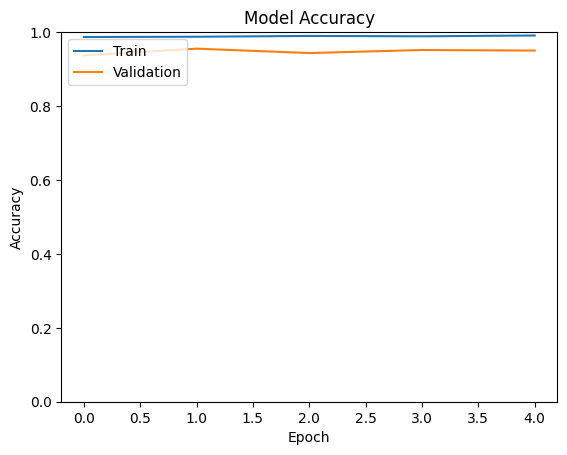

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim(0,1)
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [83]:
model.save('traffic_sign_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

Data Preprocessing: i used ImageDataGenerator by resizing the images to 32,32 and normlized the the pixiles values to a value between 0 and 1 by deviding the values on 255, the preprocessing made the data alot simpler for the model to understand and less featrures more capabilty to genrelize data and discover pattrens

model Architecture: i used 3 layers of CNN to extract features as much as the model can and 2 hidden layers and a softmax output layer, i started with a small number of layers and units and add more to get more accuracy, the CNN are the main layers that are responsibale of extracting features

Activation function: for all layers i used relus insted of the output layer i used softmax becuace we are making a multi-class prediction

Training Process: the batch size was random but the number of epochs i started wiht 100 and saw that the accuracy was high form the first epoch so i reduced it to 10, used adam as an optimizer with a learning rate of 0.001

Regularization Techniques:yes i used dropoout and batchnormlization to decreace the possibility of overfitting

Model Evaluation, Vesulization: the model did very well by returning an accuracy of 95 on the testing dataset and the learning curve doesn't show any over or under fitting , the model generalized the data very well
